# 5. Условные математические ожидания и условные распределения

In [5]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (15, 6)
rcParams['image.cmap'] = 'viridis'

![Задание](./img/p5_1.png "lol")

In [100]:
from scipy.stats import multivariate_normal
from scipy.stats import norm

In [43]:
mean = [1,4]
cov = [[10,8],[8,10]]
Xi = multivariate_normal(mean, cov)

###  График плотности случайного вектора Xi

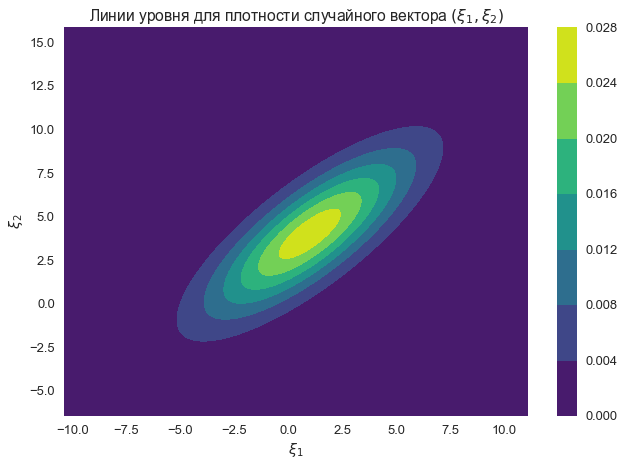

In [158]:
N = 1000
df = pd.DataFrame(Xi.rvs(N), columns=["x", "y"])
x1, y1 = np.mgrid[min(df.x):max(df.x):0.1, min(df.y):max(df.y):0.1]
pos = np.empty(x1.shape + (2,))
pos[:, :, 0] = x1
pos[:, :, 1] = y1
density = Xi.pdf(pos)
plt.contourf(x1, y1, density)
plt.xlabel(r"$\xi_1$")
plt.ylabel(r"$\xi_2$")
plt.title(r'Линии уровня для плотности случайного вектора $(\xi_1, \xi_2)$')
plt.colorbar()
plt.show()

** Построим графики условной плотности 
$f_{\xi_1|\xi_2}(x|y)$  для всех значений из y **

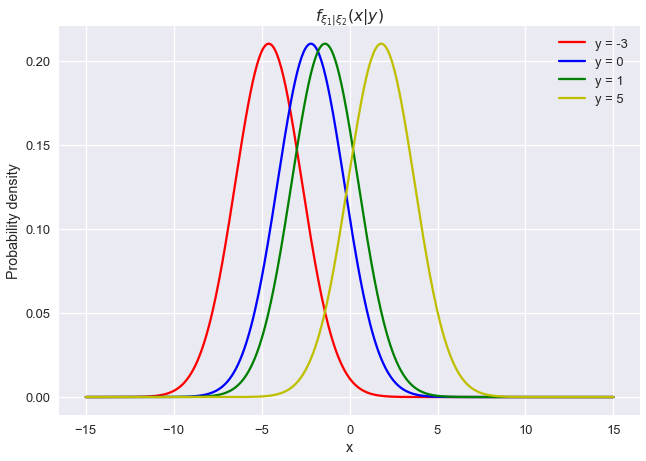

In [106]:
def ConditionalPDF(x,y):
    """
    Здесь * y -- значение случайной величины ξ1
         * x -- значение случайной величины ξ2
    Функция возвращает значение условной вероятности f_{ξ1|ξ2}(x|y)
    
    """
    # вероятность ξ2 быть равной y:
    xi2_pdf = norm.pdf(y, loc = mean[1], scale = np.sqrt(cov[1][1]))
    # согласно формуле Байеса:
    return Xi.pdf([x,y])/xi2_pdf

colors = ['r', 'b', 'g', 'y']
x_ranges = np.linspace(-15, 15, 500)
y = [-3, 0, 1, 5]

for y_val, col in zip(y,colors):
    tmp = list(map(lambda x: ConditionalPDF(x, y_val), x_ranges))
    plt.plot(x_ranges, tmp, col, label = 'y = {}'.format(y_val))
plt.title(r"$f_{\xi_1|\xi_2}(x|y)$")
plt.xlabel("x")
plt.ylabel("Probability density")
plt.legend()
plt.show()

** Построим график $E(\xi_1|\xi_2 = y)$ для всех y **

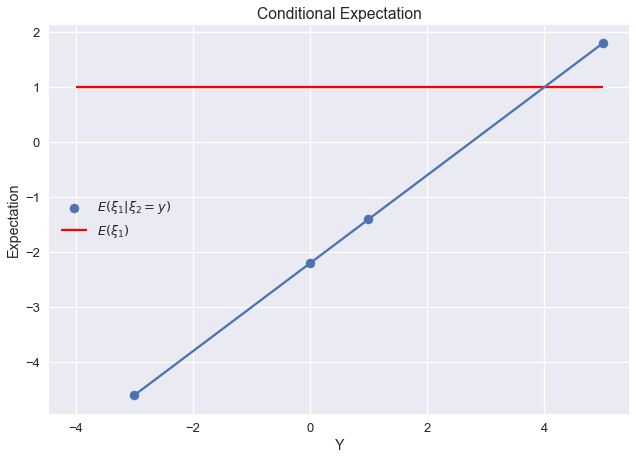

In [128]:
from scipy.integrate import quad

def ConditionalExpectation(y, limit):
    f = lambda x: x*ConditionalPDF(x, y) # функция под интегралом;
    result = quad(f, -limit, limit)[0] # итегрируем с определенной точностью;
    return result

limit = 500
expect_points = []
# для каждого y вычисляем условное матожидание;
for y_val, col in zip(y,colors):
    expect_points.append(ConditionalExpectation(y_val, limit))

# изображаем все на графике:
plt.scatter(y, expect_points, label=r'$E(\xi_1|\xi_2 = y)$')
plt.plot(y, expect_points)
plt.xlabel("Y")
plt.ylabel("Expectation")
plt.hlines(mean[0], -4, 5, colors='r', label=r'$E(\xi_1)$')
plt.title("Conditional Expectation")
plt.legend(loc='center left')
plt.show()